In [1]:
# Load fibromyalgia data

import pickle

with open('../../LatentSimilarity/data/fibromyalgia-data.pkl', 'rb') as f:
    data = pickle.load(f)

print(list(data.keys()))

['subs', 'fibromyalgia', 'fibromyalgia_score', 'rest', 'epr']


In [3]:
# Create matrix of vectorized FC data and list demographic data numpy arrays

import numpy as np

subs = list(data['subs'])
subs.sort()

# Fibromyalgia, Fibromyalgia_Score, RestOrEpr
demo_types = ['categorical', 'continuous', 'categorical']

demo = [[], [], []]
fc = []

for sub in subs:
    notin = False
    for key in data.keys():
        if sub not in data[key]:
            notin = True
    if notin:
        print(sub)
        continue
    demo[0].append(int(data['fibromyalgia'][sub]))
    demo[0].append(demo[0][-1])
    demo[1].append(int(data['fibromyalgia_score'][sub]))
    demo[1].append(demo[0][-1])
    demo[2].append(0)
    demo[2].append(1)
    fc.append(data['rest'][sub])
    fc.append(data['epr'][sub])

fc = np.stack(fc)
for i in range(len(demo)):
    demo[i] = np.array(demo[i])
    print(demo[i])

print(fc.shape)

5
[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[494   1 709   1 786   1   0   0 775   1 645   1 562   1 276   1   0   0
 496   1   0   0 503   1   0   0 720   1   0   0 489   1 690   1   0   0
   0   0 341   1 564   1 589   1   0   0 586   1 533   1   0   0   0   0
   0   0   0   0   0   0   0   0 625   1 659   1  81   1 467   1   0   0
 541   1 566   1   0   0 335   1   0   0 674   1 276   1 572   1 441   1
 206   1 449   1   0   0   0   0   0   0   0   0   0   0 647   1 621   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0

In [8]:
# Load pip DemoVAE model

import sys

p = '../pip/src'

if p not in sys.path:
    sys.path.append(p)
    print(sys.path)

from demovae import DemoVAE

vae = DemoVAE(pperiod=10, use_cuda=False, nepochs=3000, latent_dim=30, weight_decay=0, lr=5e-5, loss_rec_mult=500, loss_pred_mult=.01)
vae.fit(fc, demo, demo_types)

Fitting auxilliary guidance model for demographic 0 categorical... done
Fitting auxilliary guidance model for demographic 1 continuous... done
Fitting auxilliary guidance model for demographic 2 categorical... done
Converting input to pytorch
Converting demographics to pytorch
Beginning VAE training
Epoch 0 ReconLoss 11.8541 CovarianceLoss 23.6224 MeanLoss 0.0587 DecorLoss 9.4795 GuidanceTargets [1, 0, 462.03814697265625, 0, 1] GuidanceLosses ['152.6939', '152.6939', '574.5931', '5.3438', '5.3438'] 
Epoch 10 ReconLoss 7.2521 CovarianceLoss 29.9516 MeanLoss 0.396 DecorLoss 3.145 GuidanceTargets [1, 0, 13.629302978515625, 1, 0] GuidanceLosses ['33.9006', '33.9006', '546.6319', '46.2801', '46.2801'] 
Epoch 20 ReconLoss 4.0286 CovarianceLoss 25.7052 MeanLoss 0.3216 DecorLoss 2.8205 GuidanceTargets [1, 0, 408.0109558105469, 1, 0] GuidanceLosses ['58.527', '58.527', '342.3304', '1.4818', '1.4818'] 
Epoch 30 ReconLoss 1.9737 CovarianceLoss 23.6739 MeanLoss 0.2436 DecorLoss 1.6231 GuidanceTarg

In [22]:
import matplotlib.pyplot as plt

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

xx = vae.transform(fc, demo, demo_types)

print('Done')

Done


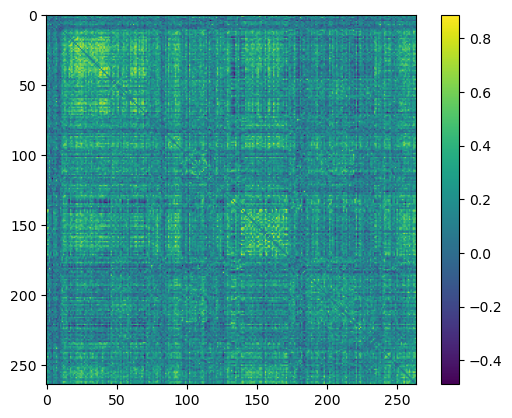

In [28]:
plt.imshow(vec2mat(xx[107]))
plt.colorbar()

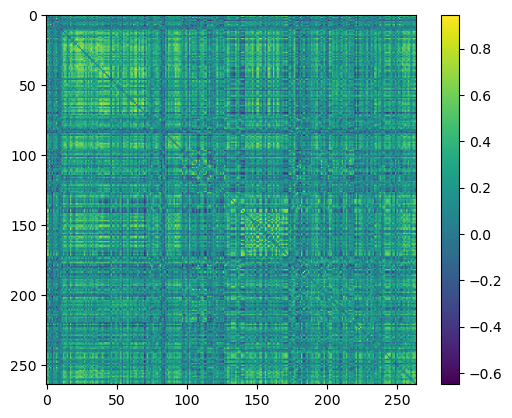

In [29]:
plt.imshow(vec2mat(fc[107]))
plt.colorbar()